In [4]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import random

In [20]:
# creating dataset
# rollno dob age gender marks grade attendance 
def generateDOB():
    start_date = datetime.date(2001, 1, 1)
    end_date   = datetime.date(2003, 12, 31)
    num_days   = (end_date - start_date).days
    rand_days   = random.randint(1, num_days)
    random_date = start_date + datetime.timedelta(days=rand_days)
    return random_date

def calculateAge(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

def generateGender():
    genders = ['M', 'F']
    return random.choice(genders)

def generateMarks():
    return random.randint(33, 85);

def calculateGrade(marks):
    if 90 < marks <= 100:
        return 'O'
    elif 80 < marks <= 90:
        return 'A'
    elif 70 < marks <=80:
        return 'B'
    elif 60 < marks <= 70:
        return 'C'
    elif 34 < marks <= 60:
        return 'D'
    else:
        return 'F'

def generateAttendance():
    return round(random.uniform(65.0, 90.0), 2)

data = {'rollno': [], 'dob': [], 'age': [], 'gender': [], 'marks': [], 'grade': [], 'attendance': []}
df = pd.DataFrame.from_dict(data);

for rollno in range(1, 4001):
    dob = generateDOB();
    age = calculateAge(dob)
    gender = generateGender()
    marks = generateMarks()
    grade = calculateGrade(marks)
    attendance = generateAttendance()
    row = [rollno, dob, age, gender, marks, grade, attendance];
    df.loc[len(df)]=row
    
df

,rollno,dob,age,gender,marks,grade,attendance
0,1,2002-10-10,20,F,75,B,84.26
1,2,2001-02-23,21,F,36,D,70.18
2,3,2001-10-09,21,F,53,D,82.20
3,4,2003-07-30,19,M,62,C,81.95
4,5,2002-02-07,21,F,79,B,72.13
...,...,...,...,...,...,...,...
3995,3996,2001-07-08,21,M,46,D,89.66
3996,3997,2003-01-23,20,F,81,A,89.74
3997,3998,2001-11-28,21,M,70,C,83.45
3998,3999,2001-06-21,21,F,74,B,84.25


In [33]:
# add 10 outliers: student with attendance < 10%, marks<10 and marks>98
def addAttendanceOutliers():
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_attendance = random.uniform(0.0, 9.9)
        df.loc[df['rollno']==rollno, 'attendance'] = new_attendance
#         print(df.loc[df['rollno']==rollno])

addAttendanceOutliers()

def addMarksOutliers():
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_marks1 = random.randint(0, 10)
        new_marks2 = random.randint(95, 100)
        new_marks = random.choice([new_marks1, new_marks2])
        df.loc[df['rollno']==rollno, 'marks'] = new_marks
#         print(df.loc[df['rollno']==rollno])

addMarksOutliers()

# add 10 inconsistencies: change grades
def addInconsistencies():
    grade = ['O', 'A', 'B', 'C', 'D', 'F']
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_grade = random.choice(grade)
        df.loc[df['rollno']==rollno, 'grade'] = new_grade
#         print(df.loc[df['rollno']==rollno])

addInconsistencies()

#add 10 missing values:
def addMissingValuesMarks():
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_grade = random.choice(grade)
        df.loc[df['rollno']==rollno, 'marks'] = np.nan
        print(df.loc[df['rollno']==rollno])
        
addMissingValuesMarks()


      rollno         dob  age gender  marks grade  attendance
1731    1732  2001-03-02   21      F    NaN     D       75.35
      rollno         dob  age gender  marks grade  attendance
1417    1418  2001-11-24   21      M    NaN     D       84.44
      rollno         dob  age gender  marks grade  attendance
1252    1253  2002-08-09   20      M    NaN     C       86.63
      rollno         dob  age gender  marks grade  attendance
3931    3932  2002-06-12   20      F    NaN     A       86.72
     rollno         dob  age gender  marks grade  attendance
337     338  2002-10-11   20      F    NaN     F       72.11
     rollno         dob  age gender  marks grade  attendance
464     465  2002-12-09   20      F    NaN     B       79.59
      rollno         dob  age gender  marks grade  attendance
2170    2171  2001-11-12   21      F    NaN     C       68.09
     rollno         dob  age gender  marks grade  attendance
772     773  2001-05-06   21      F    NaN     D       69.71
      rollno  

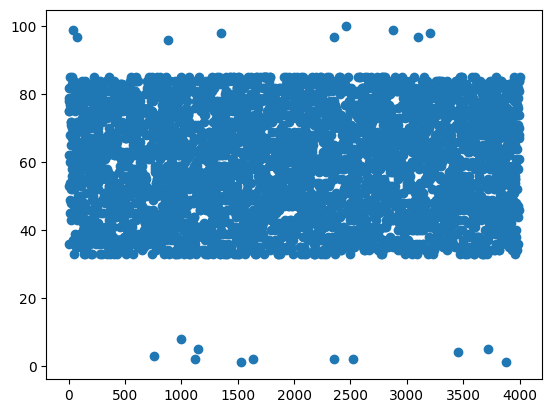

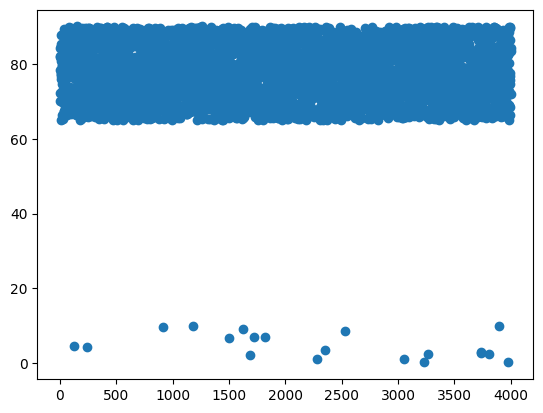

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df['rollno'].tolist(), df['marks'].tolist())
plt.show()

plt.scatter(df['rollno'].tolist(), df['attendance'].tolist())
plt.show()

In [28]:
# handle and correct inconsistencies
# use np.where()

new_df = df.where(is_correct())

In [29]:
#  use mean imputation for missing values


In [30]:
# use z-score based method for outliers